<a href="https://colab.research.google.com/github/arezyapova/projects/blob/main/Final_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект: вариант 4

***Выполнила: Резяпова Анна***

## Задание 1

Представьте, что вы аналитик в компании, которая разрабатывает приложение для обработки и оформления фотографий в формате Stories (например, для дальнейшего экспорта в Instagram Stories). Был проведен A/B тест: тестовой группе предлагалась новая модель оплаты коллекций шаблонов, контрольной – старая механика. Ваша основная задача: проанализировать итоги эксперимента и решить, нужно ли выкатывать новую модель на остальных пользователей.

В ходе отчета обоснуйте выбор метрик, на которые вы обращаете внимание. Если различия есть, то объясните, с чем они могут быть связаны и являются ли значимыми.

Данные:

* active_users – информация о пользователях, которые посещали приложение во время эксперимента. 
* groups – разбивка пользователей на контрольную (А) и тестовую (В) группы. 
* purchases – данные о транзакциях (оплатах) пользователей приложения во время эксперимента 

## 1: загружаем

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

In [ ]:
active_users = pd.read_csv('Проект_4_active_users.csv')
groups = pd.read_csv('Проект_4_groups.csv')
purchases = pd.read_csv('Проект_4_purchases.csv')

Для начала проверим структуру всех таблиц.

In [ ]:
active_users.head()

,user_id,country,platform,sex
0,8029,Russia,ios,male
1,1735,Sweden,ios,male
2,7697,Russia,android,male
3,1421,Sweden,android,female
4,1704,Russia,ios,male


In [ ]:
active_users.shape

(8341, 4)

In [ ]:
active_users.nunique()

user_id     8341
country        2
platform       2
sex            2
dtype: int64

In [ ]:
groups.head()

,user_id,group
0,9149,B
1,9150,B
2,9151,A
3,9152,B
4,9153,B


In [ ]:
groups.shape

(74576, 2)

In [ ]:
groups.nunique()

user_id    74576
group          2
dtype: int64

In [ ]:
purchases.head()

,user_id,revenue
0,4412,1000.0
1,9000,701.0
2,9001,700.0
3,9002,702.0
4,5790,1002.0


In [ ]:
purchases.shape

(541, 2)

In [ ]:
purchases.nunique()

user_id    541
revenue     98
dtype: int64

Объединим данные active_users и groups.

In [ ]:
df = active_users.merge(groups, on = 'user_id')

In [ ]:
df.shape

(8341, 5)

In [ ]:
df.isna().sum()

user_id     0
country     0
platform    0
sex         0
group       0
dtype: int64

In [ ]:
df.nunique()

user_id     8341
country        2
platform       2
sex            2
group          2
dtype: int64

In [ ]:
df = df.merge(purchases, how = 'left', on = 'user_id')

In [ ]:
df.head()

,user_id,country,platform,sex,group,revenue
0,8029,Russia,ios,male,B,NaN
1,1735,Sweden,ios,male,B,NaN
2,7697,Russia,android,male,B,NaN
3,1421,Sweden,android,female,B,NaN
4,1704,Russia,ios,male,B,NaN


In [ ]:
df.shape

(8341, 6)

In [ ]:
df.nunique()

user_id     8341
country        2
platform       2
sex            2
group          2
revenue       93
dtype: int64

In [ ]:
df.isna().sum()

user_id        0
country        0
platform       0
sex            0
group          0
revenue     7949
dtype: int64

In [ ]:
df['revenue'] = df['revenue'].fillna(0)

In [ ]:
df.revenue.nunique()

94

In [ ]:
df.loc[df.revenue > 0, 'pay'] = 'pay'
df.loc[df.revenue == 0, 'pay'] = 'not_pay'

In [ ]:
df.dtypes

user_id       int64
country      object
platform     object
sex          object
group        object
revenue     float64
pay          object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8341 entries, 0 to 8340
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   8341 non-null   int64  
 1   country   8341 non-null   object 
 2   platform  8341 non-null   object 
 3   sex       8341 non-null   object 
 4   group     8341 non-null   object 
 5   revenue   8341 non-null   float64
 6   pay       8341 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 521.3+ KB


In [ ]:
df.describe()

,user_id,revenue
count,8341.000000,8341.000000
mean,4170.000000,56.553291
std,2407.983631,311.346849
min,0.000000,0.000000
25%,2085.000000,0.000000
50%,4170.000000,0.000000
75%,6255.000000,0.000000
max,8340.000000,4660.000000


In [ ]:
df.describe(include='object')

,country,platform,sex,group,pay
count,8341,8341,8341,8341,8341
unique,2,2,2,2,2
top,Russia,android,male,B,not_pay
freq,5407,4621,4196,6803,7949


In [ ]:
df.head()

,user_id,country,platform,sex,group,revenue,pay
0,8029,Russia,ios,male,B,0.0,not_pay
1,1735,Sweden,ios,male,B,0.0,not_pay
2,7697,Russia,android,male,B,0.0,not_pay
3,1421,Sweden,android,female,B,0.0,not_pay
4,1704,Russia,ios,male,B,0.0,not_pay


## 2. Гипотезы, графики и тесты

In [ ]:
fig = px.histogram(df, x='group', barnorm = 'percent', color = 'pay')
fig.show()

По графику выше видно, что в тестовой группе В процент платящих пользователей составляет 4,62%, а в контрольной группе А - 5,07%, что пока что говорит не в пользу новой механики. Однако, нужно еще проверить, являются ли различия стат. значимыми и посмотреть на различия в выручке между группами.

In [ ]:
pd.crosstab(df.group, df.pay)

pay,not_pay,pay
group,,
A,1460,78
B,6489,314


Сделаем тест Хи-квадрат, чтобы проверить наличие значимой взаимосвязи между количеством плащих пользователей и групами

- $H_0$: взаимосвязи между переменными нет 
- $H_1$: взаимосвязь есть

In [ ]:
from scipy.stats import chi2_contingency, chi2 

In [ ]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df.pay, df.group))

In [ ]:
stat, p

(0.48480826522557896, 0.48625240457231045)

Интерпретируем результат:

In [ ]:
"""prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Отклоняем H0')
else:
    print('Не отклоняем H0')"""

"prob = 0.95\ncritical = chi2.ppf(prob, dof)\nif abs(stat) >= critical:\n    print('Отклоняем H0')\nelse:\n    print('Не отклоняем H0')"

In [ ]:
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Отклоняем H0')
else:
    print('Не отклоняем H0')

Не отклоняем H0


Тест Хи-квадрат не подтвердил взаимосвязь факта оплаты и модели оплаты.

Теперь проверим взаимосвязь выручки и модели оплаты. Вначале посмотрим на распределения выручки в тестовой и контрольной группах.

In [ ]:
fig = px.histogram(df.query('revenue>0'), x='revenue', color = 'group', histnorm = 'density')
fig.show()

По гисторамме видно, что распределения выручки в тестовой и контрольной группах не являются нормальными, и даже не близки к нему. Поэтому класический t-тест для проверки равенства средних не подойдет скорее всего. 

Посмотрим также на ящичковые диаграммы.

In [ ]:
fig = px.box(df.query('revenue>0'), y="revenue", color = 'group')
fig.show()

По графику выше видно, что есть различия в медианах в тестовой и контрольной группе. Для контрольной группы медианная выручка равна 596, а для тестовой - 1151. Однако, нужно проверить стат. значимость таких различий, прежде чем говорить о том, что новая модель оплаты увеличивает выручку почти в 2 раза.

Как выяснили ранее, распределения по гистограмме не похожи на нормальные, но для уверенности сделаем тест Шапиро на нормальность.

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(df.query('revenue != 0 & group == "A"').revenue)

ShapiroResult(statistic=0.7358548641204834, pvalue=1.5417730980793465e-10)

In [ ]:
shapiro(df.query('revenue != 0 & group == "B"').revenue)

ShapiroResult(statistic=0.8552882671356201, pvalue=1.665431681028873e-16)

Тест подтвердил, что распределения выручки в контрольной и тестовой группах **не** являются нормальными. Поэтому можно использовать непараметричесие критерии, например, Манна-Уитни, однако он покажет только различие в целом между распределениями.

In [ ]:
from scipy.stats import mannwhitneyu
mannwhitneyu(df.query('revenue != 0 & group == "A"').revenue,
        df.query('revenue != 0 & group == "B"').revenue)

MannwhitneyuResult(statistic=8961.0, pvalue=0.00023939080114586078)

Тест Манна-Уитни показал значимые различия в распределениях выручки в тестовой и контрольной групах. Однако, не понятно, где именно эти различия, т.е. есть ли различие в средних или медианах между группами.

Для ответа на этот вопрос проведем анализ с помощью bootstrap.

In [ ]:
# Импортируем необходимые функции
from scipy.stats import norm
from tqdm.auto import tqdm

plt.style.use('ggplot')

In [ ]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

Применяем функцию к нашим данным для сравнения **среднего** размера выручки в тестовой и контрольной группах на уровне значимости **5%**. 

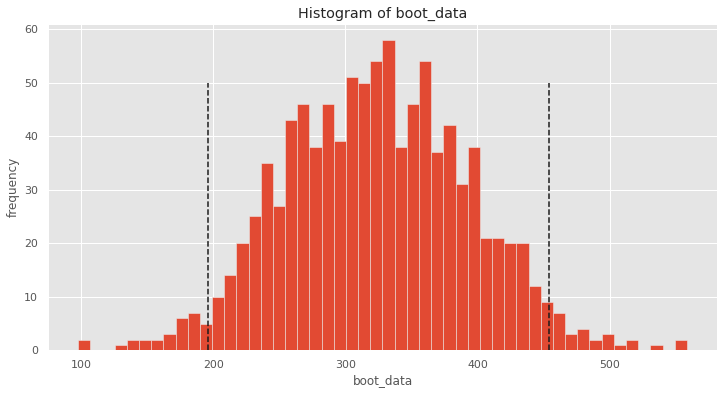

In [ ]:

booted_data = get_bootstrap(df.query('revenue != 0 & group == "B"').revenue, 
                            df.query('revenue != 0 & group == "A"').revenue,
                            boot_it = 1000, 
                            statistic = np.mean, 
                            bootstrap_conf_level = 0.95) 

In [ ]:
booted_data["p_value"]

3.2021765398973316e-06

In [ ]:
booted_data["ci"]

,0
0.025,196.076354
0.975,454.213455


Bootstrap-анализ показал **наличие значимых различий в среднем размере выручки в тестовой и контрольной группах**. 

С вероятность 95% мы можем утверждать, что новая модель оплаты увеличит средний размер выручки с платящих пользователей.

Т.е. основной вывод: нужно выкатывать новую модель на остальных пользователей.